In [66]:
import pandas as pd
import cv2
import numpy as np
from PIL import Image
import json
from keras.models import model_from_json
import matplotlib.pyplot as plt
import face_recognition
from pathlib import Path
import os

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [37]:
pth = "../imgs/"
file = "origsmall24"
ext = ".jpg"
ab_pth = pth+file+ext

In [38]:
ab_pth

'../imgs/origsmall24.jpg'

In [48]:
path_cwd = Path.cwd()
path_cwd

PosixPath('/Users/cris/Iron/ReadingyourAudience/notebooks')

In [74]:
path_cwd.stem

'notebooks'

In [75]:
imgs_folder = 'imgs'

In [76]:
path_cwd-path_cwd.stem

TypeError: unsupported operand type(s) for -: 'PosixPath' and 'str'

In [49]:
home = Path.home()
home

PosixPath('/Users/cris')

In [50]:
rel = path_cwd.relative_to(home)       
rel

PosixPath('Iron/ReadingyourAudience/notebooks')

In [63]:
path_folder_imgs = Path('/Users/cris/Iron/ReadingyourAudience/imgs')

In [69]:
print(path_folder_imgs.parent.parent)
print(path_folder_imgs.parts)
print(path_folder_imgs.stem)
print(path_folder_imgs.name)
print(path_folder_imgs.suffix)
print(f"File name: {os.path.splitext(path_folder_imgs.stem)[0]}")
print(path_folder_imgs.anchor)

/Users/cris/Iron
('/', 'Users', 'cris', 'Iron', 'ReadingyourAudience', 'imgs')
imgs
imgs

File name: imgs
/


In [ ]:
home = Path.home()

In [70]:
print(path_folder_imgs.parts[-1])

imgs


In [71]:
path_cwd.relative_to(path_folder_imgs.parts[-1])

ValueError: '/Users/cris/Iron/ReadingyourAudience/notebooks' does not start with 'imgs'

In [54]:
print(path_imgs.parts)

('/', 'Users', 'cris', 'Iron', 'ReadingyourAudience', 'imgs')


In [59]:
print(path_imgs.stem)

imgs


In [60]:
print(path_imgs.name)

imgs


In [61]:
print(path_imgs.suffix)

In [62]:
print(path_imgs.anchor)

/


In [85]:
Path.cwd()

PosixPath('/Users/cris/Iron/ReadingyourAudience/notebooks')

In [80]:
path_cwd = Path.cwd()

In [84]:
Path.cwd().parents

<PosixPath.parents>

In [89]:
pth = Path('/Users/cris/Iron/ReadingyourAudience/notebooks')
pth

PosixPath('/Users/cris/Iron/ReadingyourAudience/notebooks')

In [91]:
print(f"{pth.parents}")

<PosixPath.parents>


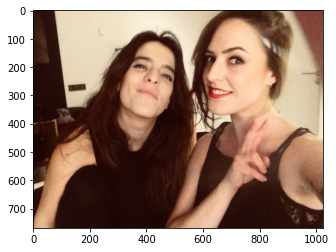

In [5]:
image = Image.open(pth)
plt.imshow(image)

In [6]:
def openImageAndDetectFaces1(path):
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image)
    try:
        print("I found {} face(s) in this photograph.".format(len(face_locations)))
        for face_location in face_locations:
            top, right, bottom, left = face_location
            face_image = image[top:bottom, left:right]
            face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
            pil_image = Image.fromarray(face_image)
            plt.imshow(pil_image)
            return new_size(pil_image)
    except ValueError as e:
        print(f"No face found")
        
        
def new_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=np.asarray(convert_from)/255
    return face

I found 2 face(s) in this photograph.


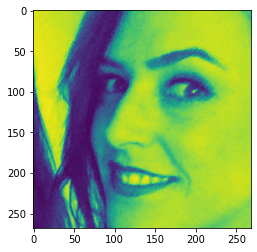

In [7]:
face = openImageAndDetectFaces1(pth)

In [34]:
pth = "../imgs/"
file = "origsmall24"
ext = ".jpg"
ab_pth = pth+file+ext

def openImageAndDetectFaces2(ab_pth):
    
    image = face_recognition.load_image_file(ab_pth)
    face_locations = face_recognition.face_locations(image)
    count = 0
    try:
        print("I found {} face(s) in this photograph.".format(len(face_locations)))
        for feis in face_locations:
            count+=1
            top, right, bottom, left = feis
            face_image = image[top:bottom, left:right]
            face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
            pil_image = Image.fromarray(face_image)
            plt.imshow(pil_image)
            new_size(pil_image)
            plt.subplot(121)
            plt.imshow(image)
            plt.subplot(122)
            plt.imshow(pil_image)
            cv2.imwrite(f"../imgs/)
            return pil_image
    except ValueError as e:
        print(f"No face found")
        return pil_image
     
        
def new_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=np.asarray(convert_from)/255
    return face

I found 4 face(s) in this photograph.


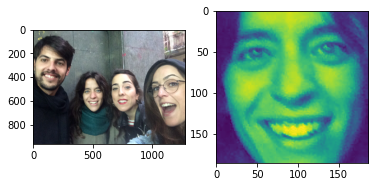

In [35]:
face = openImageAndDetectFaces2("../imgs/origsmall14.jpg")

In [22]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [1]:
image = cv2.imread(pth)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# now we can try to detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

# Draw a rectangle around the faces and display on screen
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow("Faces found", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

I found 4 face(s) in this photograph.


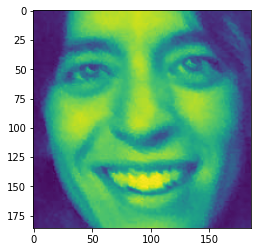

In [20]:
face = openImageAndDetectFaces("../imgs/origsmall14.jpg")